In [17]:
import pandas as pd
# Importpopulation data from wikipedia webpage
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)',header=0)[2]

In [24]:
import os
os.chdir("E:\mypractice\Python\Jigsaw")

In [30]:
writer = pd.ExcelWriter('Population.xlsx')
data.to_excel(writer,"population")
writer.save()

In [19]:
# add percentage change column
data["change_pct"] = round(((data["Population(1 July 2017)[3]"]-data["Population(1 July 2016)[3]"])/data["Population(1 July 2016)[3]"])*100,1)

In [20]:
data = data.drop("Change",axis = 1)

In [21]:
data.head()

,Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],change_pct
0,—,World,—,—,7466964280,7550262101,1.1
1,1,China[a],Asia,Eastern Asia,1403500365,1409517397,0.4
2,2,India,Asia,Southern Asia,1324171354,1339180127,1.1
3,3,United States,Americas,Northern America,322179605,324459463,0.7
4,4,Indonesia,Asia,South-eastern Asia,261115456,263991379,1.1


In [6]:
data.dtypes

Rank                           object
Country or area                object
UN continentalregion[2]        object
UN statisticalregion[2]        object
Population(1 July 2016)[3]      int64
Population(1 July 2017)[3]      int64
change_pct                    float64
dtype: object

In [22]:
data.isnull().sum()

Rank                          0
Country or area               0
UN continentalregion[2]       0
UN statisticalregion[2]       0
Population(1 July 2016)[3]    0
Population(1 July 2017)[3]    0
change_pct                    0
dtype: int64

In [23]:
data['Rank'].iloc[0] = 0

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
data.shape

(234, 7)

In [25]:
data.columns

Index(['Rank', 'Country or area', 'UN continentalregion[2]',
       'UN statisticalregion[2]', 'Population(1 July 2016)[3]',
       'Population(1 July 2017)[3]', 'change_pct'],
      dtype='object')

In [99]:
print("Number of Countries in the List are " + str(len(data['Country or area'].unique())))
print("Number of Continental Regions in the List are " + str(len(data['UN continentalregion[2]'].unique())))
print("Number of Statistical Regions in the List are " + str(len(data['UN statisticalregion[2]'].unique())))

Number of Countries in the List are 234
Number of Continental Regions in the List are 6
Number of Statistical Regions in the List are 23


In [12]:
data.drop([0],axis=0).head()

,Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],change_pct
1,1,China[a],Asia,Eastern Asia,1403500365,1409517397,0.4
2,2,India,Asia,Southern Asia,1324171354,1339180127,1.1
3,3,United States,Americas,Northern America,322179605,324459463,0.7
4,4,Indonesia,Asia,South-eastern Asia,261115456,263991379,1.1
5,5,Brazil,Americas,South America,207652865,209288278,0.8


In [10]:
import numpy as np

In [114]:
# Population total in Asian Countries
data[data['UN continentalregion[2]']=='Asia']['Population(1 July 2016)[3]'].sum()

4462676731

In [39]:
data[data['UN continentalregion[2]']=='Asia'].sort_values('Population(1 July 2016)[3]').head()

,Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],change_pct
176,176,Brunei,Asia,South-eastern Asia,423196,428697,1.3
174,174,Maldives,Asia,Southern Asia,427756,436330,2.0
167,167,Macau,Asia,Eastern Asia,612167,622567,1.7
164,164,Bhutan,Asia,Southern Asia,797765,807610,1.2
159,159,Cyprus[q],Asia,Western Asia,1170125,1179551,0.8


In [40]:
data.dtypes

Rank                           object
Country or area                object
UN continentalregion[2]        object
UN statisticalregion[2]        object
Population(1 July 2016)[3]      int64
Population(1 July 2017)[3]      int64
change_pct                    float64
dtype: object

In [100]:
data[data['UN continentalregion[2]']=='Asia'].sort_values('Population(1 July 2016)[3]')['Country or area']

176                  Brunei
174                Maldives
167                   Macau
164                  Bhutan
159               Cyprus[q]
156              East Timor
152                 Bahrain
142                   Qatar
138                 Armenia
137                Mongolia
133              Georgia[o]
130                  Kuwait
127                    Oman
121            Palestine[m]
115               Singapore
113            Turkmenistan
112              Kyrgyzstan
111                 Lebanon
106                    Laos
104               Hong Kong
100                  Israel
96               Tajikistan
94     United Arab Emirates
92                   Jordan
90            Azerbaijan[i]
71                 Cambodia
64               Kazakhstan
63                    Syria
58                Sri Lanka
56                Taiwan[h]
52              North Korea
50                    Yemen
48                    Nepal
45              Malaysia[f]
44               Uzbekistan
41             Saudi

In [101]:
len(data[data['UN continentalregion[2]']=='Asia']['Country or area'])

51

Contries in Asia within Rank 50

In [102]:
data.Rank = data.Rank.astype('int')
data[(data['UN continentalregion[2]']=='Asia')&(data['Rank']<=50)]

,Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],change_pct
1,1,China[a],Asia,Eastern Asia,1403500365,1409517397,0.4
2,2,India,Asia,Southern Asia,1324171354,1339180127,1.1
4,4,Indonesia,Asia,South-eastern Asia,261115456,263991379,1.1
6,6,Pakistan,Asia,Southern Asia,193203476,197015955,2.0
8,8,Bangladesh,Asia,Southern Asia,162951560,164669751,1.1
11,11,Japan,Asia,Eastern Asia,127748513,127484450,-0.2
13,13,Philippines,Asia,South-eastern Asia,103320222,104918090,1.5
15,15,Vietnam,Asia,South-eastern Asia,94569072,95540800,1.0
18,18,Iran,Asia,Southern Asia,80277428,81162788,1.1
19,19,Turkey,Asia,Western Asia,79512426,80745020,1.6


In [48]:
Y = data.groupby('UN continentalregion[2]',as_index=False).agg({'Population(1 July 2016)[3]':sum}).loc[0:4,:]
Y

,UN continentalregion[2],Population(1 July 2016)[3]
0,Africa,1225080510
1,Americas,997642449
2,Asia,4462676731
3,Europe,744347158
4,Oceania,40117432


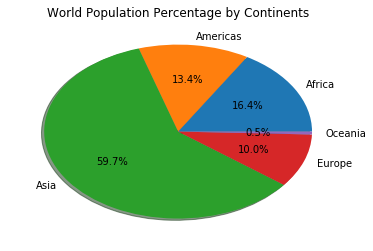

In [73]:
labels = Y["UN continentalregion[2]"].tolist()
plt.pie(Y["Population(1 July 2016)[3]"], labels = labels,pctdistance=0.6, autopct='%1.1f%%',shadow=True, labeldistance=1.1)
plt.title("World Population Percentage by Continents")
plt.show()

In [77]:
Z =pd.DataFrame(data["UN statisticalregion[2]"].value_counts())

In [85]:
Z["Region"] = Z.index
Z.head()

,UN statisticalregion[2],Region
Caribbean,26,Caribbean
Eastern Africa,20,Eastern Africa
Western Asia,18,Western Asia
Western Africa,17,Western Africa
Southern Europe,16,Southern Europe


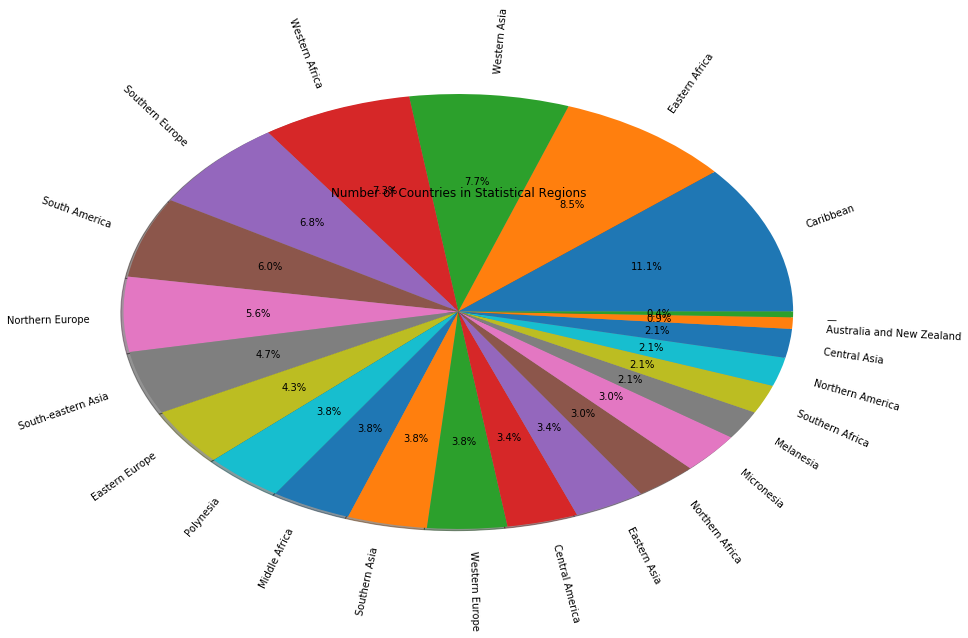

In [92]:
labels = Z.Region.tolist()
plt.pie(Z["UN statisticalregion[2]"], labels = labels,pctdistance=0.6,rotatelabels = True,radius=2.5, autopct='%1.1f%%',shadow=True, labeldistance=1.1)
plt.title("Number of Countries in Statistical Regions")
plt.show()